In [33]:
import pandas as pd

df1 = pd.read_csv('./data/train.csv')
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
df1.shape

(8693, 14)

In [35]:
df2 = df1.drop(['Name','Age'],axis=1)
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(5), object(6)
memory usage: 755.7+ KB


In [37]:
df2['HomePlanet'].unique()
# df1[df1['HomePlanet'] == "Earth"].shape

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [38]:
df2['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [39]:
def getSuccesRateOnTransported(column):
    return  (df2[column].isna() & (df2['Transported'] == True)).sum() / df2[column].isna().sum()

getSuccesRateOnTransported('Destination')

0.5054945054945055

In [40]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True


<Axes: xlabel='HomePlanet'>

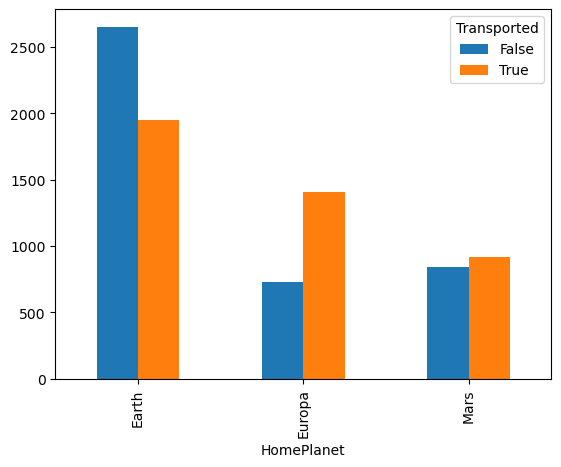

In [41]:
counts = df2.groupby(['HomePlanet','Transported']).size().unstack()

counts.plot(kind='bar')

<Axes: xlabel='Destination'>

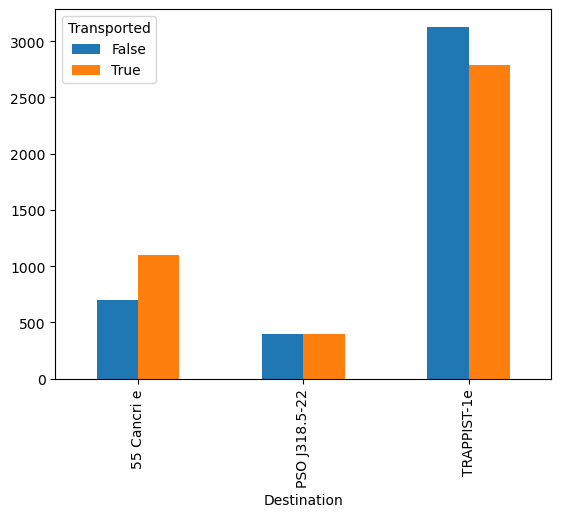

In [42]:
counts2 = df2.groupby(['Destination','Transported']).size().unstack()

counts2.plot(kind='bar')

<Axes: xlabel='CryoSleep'>

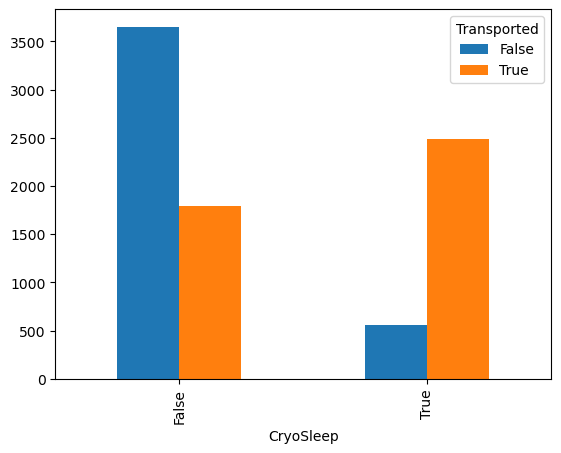

In [43]:
counts3 = df2.groupby(['CryoSleep','Transported']).size().unstack()

counts3.plot(kind='bar')

<Axes: xlabel='Side'>

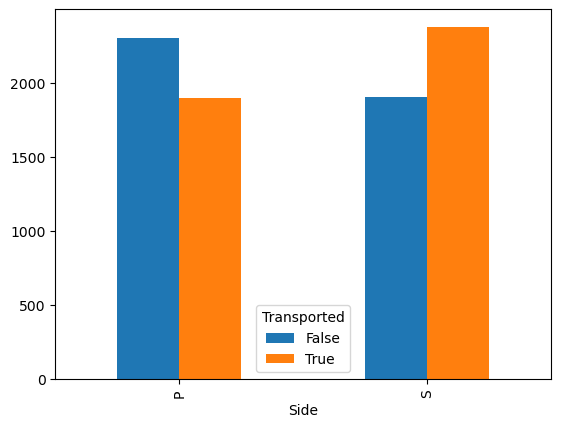

In [44]:
df2['Side'] = df2['Cabin'].apply(lambda cabin: cabin.split('/')[-1] if pd.notna(cabin) else None)

counts4 = df2.groupby(['Side','Transported']).size().unstack()

counts4.plot(kind='bar')    

<Axes: xlabel='VIP'>

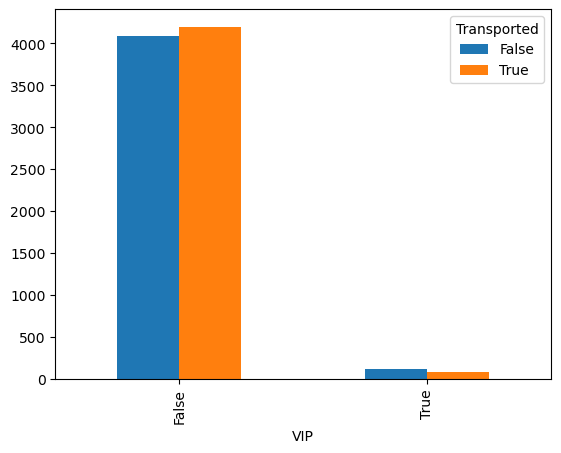

In [45]:
counts5 = df2.groupby(['VIP','Transported']).size().unstack()

counts5.plot(kind='bar')       # as the vip status is not making significant change we can drop it

In [46]:
# df3 = df2.drop(['Cabin','VIP'],axis=1)
df3 = df2.drop(['Cabin'],axis=1)
df3.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,P
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,S
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,S
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,S
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,S


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Side          8494 non-null   object 
dtypes: bool(1), float64(5), object(6)
memory usage: 755.7+ KB


In [48]:
def getNullCount(col):
    return df3[col].isna().sum()

print(
    "HomePlanet:", getNullCount('HomePlanet'), '\t',
    "CryoSleep:", getNullCount('CryoSleep'), '\t',
    "Destination:", getNullCount('Destination'), '\t',
    "Side:", getNullCount('Side')
)

HomePlanet: 201 	 CryoSleep: 217 	 Destination: 182 	 Side: 199


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Side          8494 non-null   object 
dtypes: bool(1), float64(5), object(6)
memory usage: 755.7+ KB


In [50]:
df3.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,P
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,S
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,S
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,S
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,S


In [51]:
columns = [col for col in df3.columns if col != "Transported"] + ['Transported']    # creates a string of col names

df3 = df3[columns]
df3.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side,Transported
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,P,False
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,S,True
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,S,False
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,S,False
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,S,True


In [52]:
X = df3.iloc[:, :-1]
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
0,0001_01,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,S
2,0003_01,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,S
3,0003_02,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,S
4,0004_01,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,S


In [53]:
Y = df3.iloc[:,-1]
Y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [
        ("homeplanet_ohe", OneHotEncoder(drop="first"), ['HomePlanet']),
        ("destination_ohe", OneHotEncoder(drop="first"), ['Destination']),
        ("side_ohe", OneHotEncoder(drop="first"), ['Side'])
    ],
    remainder="passthrough",  # Leave the rest of the columns untouched
)

X_transformed = ct.fit_transform(X)

In [55]:
ct.transformers_[0]

('homeplanet_ohe', OneHotEncoder(drop='first'), ['HomePlanet'])

In [56]:
homeplanet_columns = ct.transformers_[0][1].get_feature_names_out()
destination_columns = ct.transformers_[1][1].get_feature_names_out()
side_columns = ct.transformers_[2][1].get_feature_names_out()

homeplanet_columns,destination_columns,side_columns

(array(['HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan'],
       dtype=object),
 array(['Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
        'Destination_nan'], dtype=object),
 array(['Side_S', 'Side_None'], dtype=object))

In [57]:
columns = ['PassengerId', 'CryoSleep','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
X_transformed_df = pd.DataFrame(X_transformed,columns=list(homeplanet_columns) + list(destination_columns) + list(side_columns) + columns)
X_transformed_df['CryoSleep'] = X_transformed_df['CryoSleep'].astype('Int8')
X_transformed_df['VIP'] = X_transformed_df['VIP'].astype('Int8')

In [58]:
X_transformed_df.head()

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,Side_S,Side_None,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0001_01,0,0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0002_01,0,0,109.0,9.0,25.0,549.0,44.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0003_01,0,1,43.0,3576.0,0.0,6715.0,49.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0003_02,0,0,0.0,1283.0,371.0,3329.0,193.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0004_01,0,0,303.0,70.0,151.0,565.0,2.0


In [59]:
X_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   HomePlanet_Europa          8693 non-null   object
 1   HomePlanet_Mars            8693 non-null   object
 2   HomePlanet_nan             8693 non-null   object
 3   Destination_PSO J318.5-22  8693 non-null   object
 4   Destination_TRAPPIST-1e    8693 non-null   object
 5   Destination_nan            8693 non-null   object
 6   Side_S                     8693 non-null   object
 7   Side_None                  8693 non-null   object
 8   PassengerId                8693 non-null   object
 9   CryoSleep                  8476 non-null   Int8  
 10  VIP                        8490 non-null   Int8  
 11  RoomService                8512 non-null   object
 12  FoodCourt                  8510 non-null   object
 13  ShoppingMall               8485 non-null   object
 14  Spa     

In [60]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer for object columns
imputer = SimpleImputer(strategy='most_frequent')

# List of object columns to impute
object_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Impute missing values in object columns
X_transformed_df[object_columns] = imputer.fit_transform(X_transformed_df[object_columns])

# Convert all columns to int8
columns = X_transformed_df.columns
X_transformed_df.fillna(0,inplace=True)
X_transformed_df[columns] = X_transformed_df[columns].astype('int8')

# Check the info of the DataFrame
X_transformed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   HomePlanet_Europa          8693 non-null   int8 
 1   HomePlanet_Mars            8693 non-null   int8 
 2   HomePlanet_nan             8693 non-null   int8 
 3   Destination_PSO J318.5-22  8693 non-null   int8 
 4   Destination_TRAPPIST-1e    8693 non-null   int8 
 5   Destination_nan            8693 non-null   int8 
 6   Side_S                     8693 non-null   int8 
 7   Side_None                  8693 non-null   int8 
 8   PassengerId                8693 non-null   int8 
 9   CryoSleep                  8693 non-null   int8 
 10  VIP                        8693 non-null   int8 
 11  RoomService                8693 non-null   int8 
 12  FoodCourt                  8693 non-null   int8 
 13  ShoppingMall               8693 non-null   int8 
 14  Spa                     

In [61]:
X_transformed_df

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,Side_S,Side_None,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,1,0,0,0,101,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,-55,0,0,109,9,25,37,44
2,1,0,0,0,1,0,1,0,45,0,1,43,-8,0,59,49
3,1,0,0,0,1,0,1,0,46,0,0,0,3,115,1,-63
4,0,0,0,0,1,0,1,0,-111,0,0,47,70,-105,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0,113,0,1,0,-93,0,107,74
8689,0,0,0,1,0,0,1,0,57,1,0,0,0,0,0,0
8690,0,0,0,0,1,0,1,0,-99,0,0,0,0,80,1,0
8691,1,0,0,0,0,0,1,0,1,0,0,0,25,0,97,-93


In [62]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, Y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7372052903967797


In [63]:
xgb_model.score(X_train,y_train)

0.8856773080241588

In [64]:
dataframe = pd.read_csv('./data/test.csv')
dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [65]:
dataframe.drop(['Name', 'Age',],axis=1,inplace=True)

In [66]:
dataframe['Side'] = dataframe['Cabin'].apply(lambda cabin: cabin.split('/')[-1] if pd.notna(cabin) else None)
dataframe.drop(['Cabin',],axis=1,inplace=True)
dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side
0,0013_01,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,S
1,0018_01,Earth,False,TRAPPIST-1e,False,0.0,9.0,0.0,2823.0,0.0,S
2,0019_01,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,S
3,0021_01,Europa,False,TRAPPIST-1e,False,0.0,6652.0,0.0,181.0,585.0,S
4,0023_01,Earth,False,TRAPPIST-1e,False,10.0,0.0,635.0,0.0,0.0,S


In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [
        ("homeplanet_ohe", OneHotEncoder(drop="first"), ['HomePlanet']),
        ("destination_ohe", OneHotEncoder(drop="first"), ['Destination']),
        ("side_ohe", OneHotEncoder(drop="first"), ['Side'])
    ],
    remainder="passthrough",  # Leave the rest of the columns untouched
)

X_test_transformed = ct.fit_transform(dataframe)

In [68]:
X_test_transformed

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 2823.0, 0.0],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 523.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [69]:
homeplanet_columns = ct.transformers_[0][1].get_feature_names_out()
destination_columns = ct.transformers_[1][1].get_feature_names_out()
side_columns = ct.transformers_[2][1].get_feature_names_out()

# homeplanet_columns,destination_columns,side_column

columns = ['PassengerId', 'CryoSleep','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
X_transformed_df = pd.DataFrame(X_test_transformed,columns=list(homeplanet_columns) + list(destination_columns) + list(side_columns) + columns) # X_test_transformed
X_transformed_df['CryoSleep'] = X_transformed_df['CryoSleep'].astype('Int8')
X_transformed_df['VIP'] = X_transformed_df['VIP'].astype('Int8')

In [70]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer for object columns
imputer = SimpleImputer(strategy='most_frequent')

# List of object columns to impute
object_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Impute missing values in object columns
X_transformed_df[object_columns] = imputer.fit_transform(X_transformed_df[object_columns])

# Convert all columns to int8
columns = X_transformed_df.columns
X_transformed_df.fillna(0,inplace=True)
X_transformed_df[columns] = X_transformed_df[columns].astype('int8')

# Check the info of the DataFrame
# X_transformed_df.info()

In [71]:
X_transformed_df

,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,Side_S,Side_None,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,0,0,1,0,1,0,21,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,9,0,0,0,9,0,7,0
2,1,0,0,0,0,0,1,0,109,1,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,53,0,0,0,-4,0,-75,73
4,0,0,0,0,1,0,1,0,-3,0,0,10,0,123,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,0,1,0,1,0,-118,1,0,0,0,0,0,0
4273,0,0,0,0,1,0,0,1,-75,0,0,0,79,17,10,-112
4274,0,1,0,0,0,0,0,0,125,1,0,0,0,0,0,0
4275,1,0,0,0,0,1,0,0,69,0,0,0,120,0,0,11


In [72]:
y_pred = xgb_model.predict(X_transformed_df)
y_pred.shape

(4277,)

In [73]:
dataframe = pd.read_csv('./data/test.csv')

In [74]:
final_df = pd.concat([dataframe['PassengerId'],pd.DataFrame(y_pred)], axis=1)

In [75]:
final_df.columns = ['PassengerId', 'Transported']

# Convert the 'Transported' column to boolean (True if 1, False if 0)
final_df['Transported'] = final_df['Transported'].apply(lambda val: True if val == 1 else False)

# Save the final DataFrame to a CSV file
# final_df.to_csv('final_predictions.csv', index=False)
